# Visualization of Confusion/Similarity Matrix and PCA-based Dimensionality Reduction

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


## Generate Data

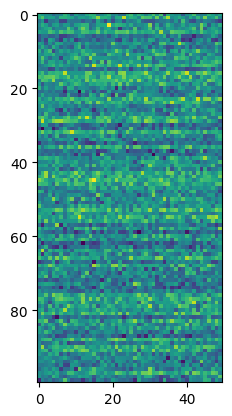

In [3]:
# User input
n_samples  = 100
n_features =  50

# Prep
truth = np.empty(n_samples)
data  = np.empty((n_samples, n_features))
np.random.seed(42)

# Generate
for i, mu in enumerate(np.random.choice([0,1,2,3], n_samples, replace=True)):
    truth[i]  = mu
    data[i,:] = np.random.normal(loc=mu, scale=1.5, size=n_features)

# Show
plt.imshow(data, interpolation='none')  # data is an NxD matrix, where N is number of samples and D its dimensionalites
plt.show()

## Dimensionality Reduction with PCA

In [4]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA
pca = PCA(n_components=2).fit(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

data2D = pca.transform(scaled_data)

[0.3729783  0.03876233]
[43.1843898  13.92162536]


Based on the explained_variance_ratio, we can see that the first dimension dominates the performance.

## Visualize Ground Truth

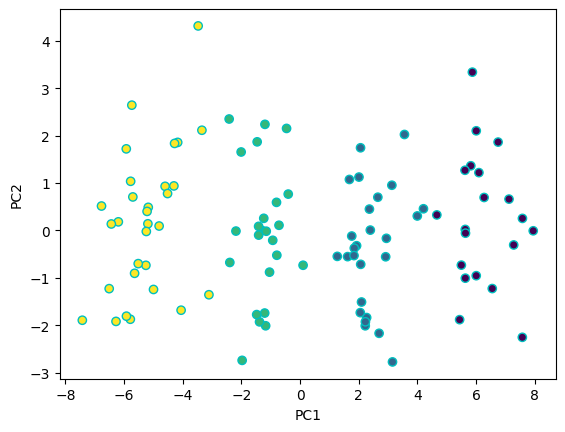

In [6]:
# Show with ground truth label
plt.scatter(data2D[:, 0], data2D[:, 1],
            c=truth, edgecolor='c')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Visualize Kmeans Results

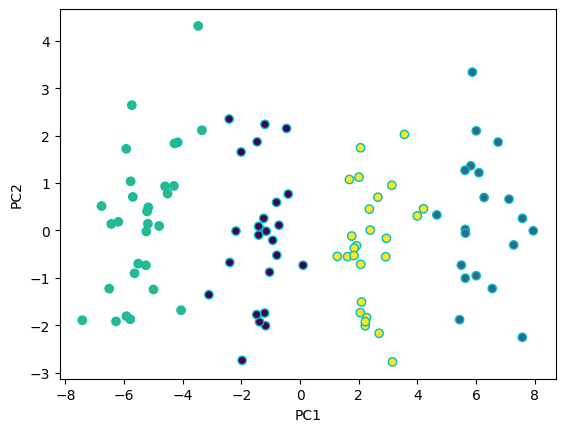

In [8]:
# Kmeans
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=3, random_state=0)
km.fit(data2D[:, 0:1])   # See what happened for Kmeans results and confusion matrix below with data2D[:, 0:1] as input

# Show
plt.scatter(data2D[:, 0], data2D[:, 1],
            c=km.labels_, edgecolor='c')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Visualize Confusion Matrix

In [9]:
# Prep
k_labels = km.labels_  # Get cluster labels
k_labels_matched = np.empty_like(k_labels)

# For each cluster label...
for k in np.unique(k_labels):

    # ...find and assign the best-matching truth label
    match_nums = [np.sum((k_labels==k)*(truth==t)) for t in np.unique(truth)]
    k_labels_matched[k_labels==k] = np.unique(truth)[np.argmax(match_nums)]

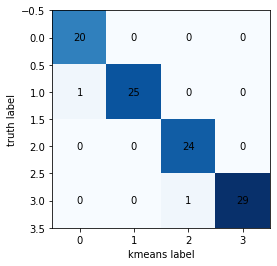

In [ ]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth, k_labels_matched)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

## Visualize Similarity Matrix

Three types:

*   YY' (Y is one-hot label matrix)
*   Similarity matrix with original data
*   Similarity matrix with PCA reduced 2D data



### Similarity matrix -- YY'

For one-hot encoding
*  Reshape your data using array.reshape(-1, 1) if your data has a single feature  
*  Reshape your data using array.reshape(1, -1) if it contains a single sample


In [ ]:
# One-Hot Label Encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
labels = np.sort(truth)   # sort labels
labels = np.reshape(labels, (-1, 1)) # reshape to an array with N rows and 1 column
enc_labels = enc.fit_transform(labels)

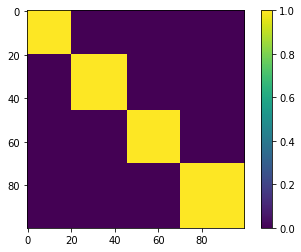

In [ ]:
# Compute similarity matrix YY'
Y = enc_labels.todense()
sim = Y * Y.transpose()

# Show
plt.imshow(sim, interpolation='none', cmap = 'viridis')
plt.colorbar()
plt.show()

### Similarity matrix -- Original data

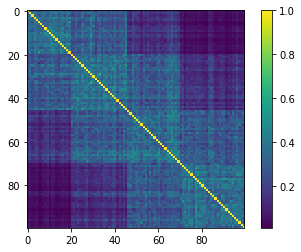

In [ ]:
from scipy.spatial.distance import pdist, squareform
# Sort data with order of label
X = scaled_data[np.argsort(truth), :]

# Compute similarity matrix based on RBF kernel
pairwise_dists = squareform(pdist(X, 'euclidean'))
K1 = np.exp(-pairwise_dists ** 2 / 8 ** 2)

# Show
plt.imshow(K1, interpolation='none', cmap = 'viridis')
plt.colorbar()
plt.show()

### Similarity matrix -- PCA reduced 2D data

(100, 2)


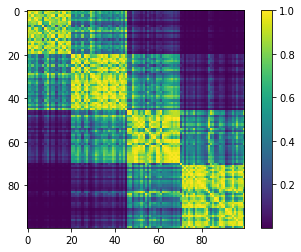

In [ ]:
X = data2D[np.argsort(truth), :]

print(X.shape)

pairwise_dists = squareform(pdist(X, 'euclidean'))
K2 = np.exp(-pairwise_dists ** 2 / 5 ** 2)

plt.imshow(K2, interpolation='none', cmap = 'viridis')
plt.colorbar()
plt.show()

Similarity matrix -- PCA reduced 1D data

(100, 1)


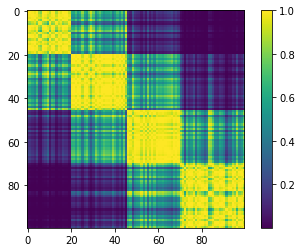

In [ ]:
X = data2D[np.argsort(truth), 0:1]

print(X.shape)

pairwise_dists = squareform(pdist(X, 'euclidean'))
K3 = np.exp(-pairwise_dists ** 2 / 5 ** 2)

plt.imshow(K3, interpolation='none', cmap = 'viridis')
plt.colorbar()
plt.show()

### Put All Together

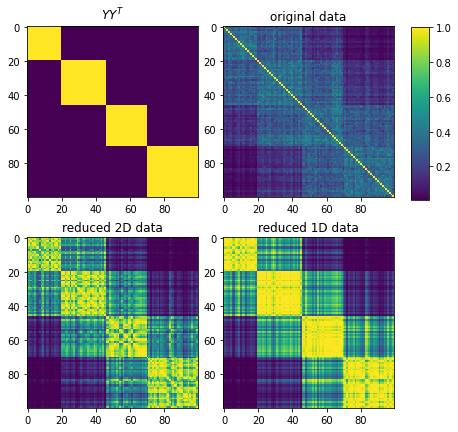

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
im1 = axes[0, 0].imshow(sim, interpolation='none', cmap='viridis')
im2 = axes[0, 1].imshow(K1, interpolation='none', cmap='viridis')
im3 = axes[1, 0].imshow(K2, interpolation='none', cmap='viridis')
im4 = axes[1, 1].imshow(K3, interpolation='none', cmap='viridis')

axes[0, 0].set_title(r'$YY^T$')
axes[0, 1].set_title('original data')
axes[1, 0].set_title('reduced 2D data')
axes[1, 1].set_title('reduced 1D data')


# add space for colour bar
fig.subplots_adjust(bottom=0, top=1.4, left=0, right=0.85,
                    wspace=0.15, hspace=0.1)
cbar_ax = fig.add_axes([0.89, 0.76, 0.04, 0.6])
fig.colorbar(im2, cax=cbar_ax)

## Summary

PCA is helpful for dimensionality reduction and visualization.
The Kmeans clustering performs slightly better with 2D reduced data than that with 1D input.

In general, the ideal similarity matrix has a more pure block diagonal structure, this partially reflects how easy data can be clustered/classified, but the clustering/classficiation performance also depends on the algorithm itself.